In [1]:
import keras
from keras.models import Sequential, save_model
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator

import datetime
import time

Using TensorFlow backend.


In [2]:
inputShape = (128, 128, 1)

## CNN Layers

In [3]:
model = Sequential()
model.add(Conv2D(filters = 4, 
                 kernel_size = (3, 3), 
                 input_shape= inputShape, 
                 strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## FCC Layers

In [4]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(26))
model.add(Activation('softmax'))

## Compile

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 4)       40        
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 4)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 8)         296       
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1168      
__________

## Dataset

In [6]:
batch_size = 1

train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        'dataset/train',  # this is the target directory
        target_size=(128, 128),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        'dataset/validation',
        target_size=(128, 128),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')

Found 187586 images belonging to 26 classes.
Found 20777 images belonging to 26 classes.


## Train

In [7]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('model.h5')  # always save your weights after training or during training

Epoch 1/10
2000/2000 [==============================] - 24s - loss: 6.0017 - acc: 0.0920 - val_loss: 2.8443 - val_acc: 0.1988
Epoch 2/10
2000/2000 [==============================] - 23s - loss: 2.7173 - acc: 0.2475 - val_loss: 2.2163 - val_acc: 0.3987
Epoch 3/10
2000/2000 [==============================] - 23s - loss: 2.1843 - acc: 0.3995 - val_loss: 1.9466 - val_acc: 0.4700
Epoch 4/10
2000/2000 [==============================] - 23s - loss: 1.9436 - acc: 0.4640 - val_loss: 1.6127 - val_acc: 0.5413
Epoch 5/10
2000/2000 [==============================] - 23s - loss: 1.6699 - acc: 0.5265 - val_loss: 1.4183 - val_acc: 0.6275
Epoch 6/10
2000/2000 [==============================] - 23s - loss: 1.5262 - acc: 0.5835 - val_loss: 1.3774 - val_acc: 0.6338
Epoch 7/10
2000/2000 [==============================] - 23s - loss: 1.3689 - acc: 0.6095 - val_loss: 1.1307 - val_acc: 0.6763
Epoch 8/10
2000/2000 [==============================] - 23s - loss: 1.2804 - acc: 0.6425 - val_loss: 0.9926 - val_acc:

## Score

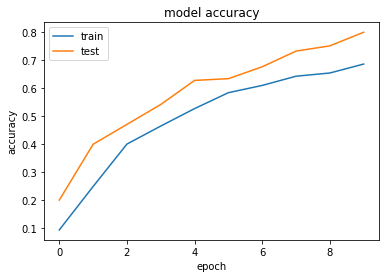

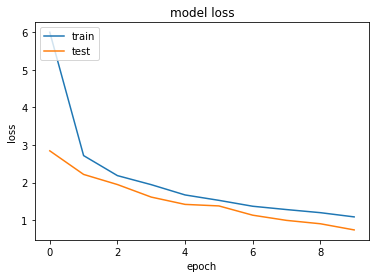

In [8]:
import matplotlib.pyplot as plt
import numpy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving Model

In [9]:
fileName = 'model_' + datetime.datetime.fromtimestamp(time.time()).strftime('%Y_%m_%d_%H_%M_%S')

model_yaml = model.to_yaml()
with open("model/" + fileName + ".yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
save_model(model, 'model/' + fileName + '.h5')